<a href="https://colab.research.google.com/github/gulce0/IE-423/blob/main/Task6_Gulce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='#475468'> Customer Segmentation:</font>
### <font color='#475468'> Can you segment customers by purchasing behavior?</font>

## Initialize

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dfBlc =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/blackfriday/train.csv', encoding = "ISO-8859-1")

In [4]:
dfBlc.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Prepare Data

In [37]:
# Aggregate data by User_ID with total purchase amount and product count
df_agg = (dfBlc.groupby('User_ID').agg({'Product_ID': 'count', 'Purchase': 'sum'})
          .rename(columns={'Product_ID': 'product_count', 'Purchase': 'total_purchase'})
         )

# Ensure no missing values
df_agg = df_agg.dropna()
df_agg

,product_count,total_purchase
User_ID,,
1000001,35,334093
1000002,77,810472
1000003,29,341635
1000004,14,206468
1000005,106,821001
...,...,...
1006036,514,4116058
1006037,122,1119538
1006038,12,90034


In [6]:
# Scale data
X = df_agg
X[X.columns] = scale(X[X.columns])

# Check the scaled data
print(X.head())

         product_count  total_purchase
User_ID                               
1000001      -0.544633       -0.562679
1000002      -0.152772       -0.057807
1000003      -0.600613       -0.554686
1000004      -0.740563       -0.697937
1000005       0.117798       -0.046648


*The scaled total_purchase and product_count values give an indication of the relative spending behavior of users. Higher positive values indicate higher spending compared to the mean, while lower (negative) values indicate lower spending compared to the mean.*

*By Scaling values of these columns have been transformed to have a mean of 0 and a standard deviation of 1. This is typically done to standardize the range of independent variables or features of data.*

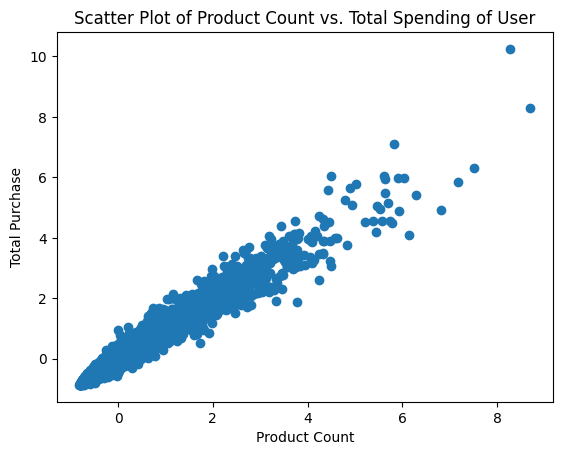

In [7]:
# Visualize scatter plot
plt.scatter(df_agg['product_count'], df_agg['total_purchase'])
plt.xlabel('Product Count')
plt.ylabel('Total Purchase')
plt.title('Scatter Plot of Product Count vs. Total Spending of User')
plt.show()

*Each point depicts customer. As the number of products purchased increases, the total spending also tends to increase. Most users purchase fewer products and have lower total spending. However, there are some users with a higher product count and correspondingly higher total spending*.

*For further analysis, i will do customer segmentation.*

### K-Means Clustering

In order to segment the customers, let's start by randomly assigning them to 'n' clusters.  Thereafter, each customer is reassigned to another cluster that it is closer to, and this process is repeated until no more improvements are possible.  This method is known as **K-Means Clustering**.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

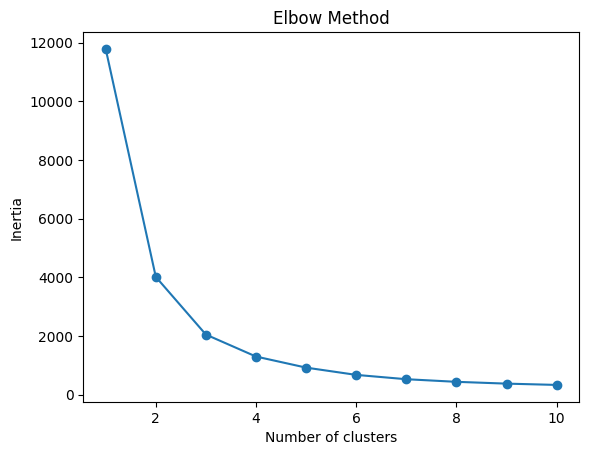

In [8]:
from sklearn.cluster import KMeans

# Use the elbow method to find the optimal number of clusters
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

*It looks like the optimal number of clusters is around 3 or 4, where the inertia starts to decrease more slowly.*

In [14]:
# Build k-Means Clustering model
from sklearn.cluster import KMeans

optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
# Regenerate kMeans_labels with the current X
kMeans_labels = kmeans.fit_predict(X)

# Assign the cluster labels to your DataFrame
df_agg['cluster'] = kMeans_labels  # Add this line to create the 'cluster' column



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


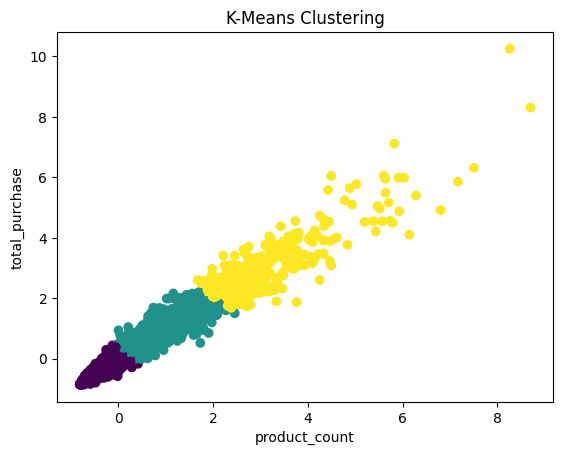

In [15]:
# Visualize the clusters

plt.scatter(X['product_count'],X['total_purchase'],c=kMeans_labels)
plt.xlabel('product_count')
plt.ylabel('total_purchase')
plt.title('K-Means Clustering')
plt.show()



*The different colors represent different clusters identified by the k-means algorithm. Purple cluster has users with low product counts and low total purchases. This suggests these users are either new or infrequent buyers. Users in yellow cluster have a moderate number of product counts and total purchases. These users might be occasional buyers. Users in green cluster have high product counts and high total purchases. These are your most active and high-value customers.*


*Since we don't have a ground-truth to calculate an accuracy score (like we did in Supervised Learning), we will need to measure how similar an object is to its own cluster (cohesion) compared to other clusters (separation).  This is known as the Silhouette Score. The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.*

In [16]:
cluster_counts = df_agg['cluster'].value_counts()
print(cluster_counts)

cluster
0    4343
1    1240
2     308
Name: count, dtype: int64


In [17]:
# Evaluate quality of clusters
from sklearn.metrics import silhouette_score

# Evaluate silhouette score
silhouette_avg = silhouette_score(X, df_agg['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Describe each cluster
for cluster in range(optimal_clusters):
    cluster_data = df_agg[df_agg['cluster'] == cluster]
    print(f"Cluster {cluster} Statistics:")
    print(cluster_data.describe())
    print("\n")

Silhouette Score: 0.7235224544767868
Cluster 0 Statistics:
       product_count  total_purchase  cluster
count    4343.000000     4343.000000   4343.0
mean       -0.460255       -0.468224      0.0
std         0.257643        0.287491      0.0
min        -0.815204       -0.867281      0.0
25%        -0.675253       -0.709395      0.0
50%        -0.535303       -0.545477      0.0
75%        -0.283393       -0.270358      0.0
max         0.416359        0.434376      0.0


Cluster 1 Statistics:
       product_count  total_purchase  cluster
count    1240.000000     1240.000000   1240.0
mean        0.820438        0.868928      1.0
std         0.511825        0.498399      0.0
min        -0.022152       -0.010715      1.0
25%         0.397698        0.459480      1.0
50%         0.724249        0.770373      1.0
75%         1.181420        1.217516      1.0
max         2.459632        2.189421      1.0


Cluster 2 Statistics:
       product_count  total_purchase  cluster
count     308.00000

*These clusters can be used to segment customers into different categories:*

*Cluster 0: Low-spending customers.*

*Cluster 1: Moderate-spending customers.*

*Cluster 2: High-spending customers.*

We want to make Silhouette Score closer to 1 as far as possible.

In [18]:
# Function for K-means Clustering
def cluster_kMeans(X, k):
    mdlKmcRtc = KMeans(n_clusters=k, random_state=1)
    mdlKmcRtc.fit(X)
    kMeans_labels = mdlKmcRtc.labels_
    kMeans_sil_score = silhouette_score(X, mdlKmcRtc.labels_)
    return (kMeans_labels, kMeans_sil_score)

In [19]:
# Iterate over different values of k to determine best silhouette score

for k in [2, 3, 4, 5, 6]:
    kMeans_labels, kMeans_sil_score = cluster_kMeans(X,k)
    print('k: ',k,'\t\t', 'Silhouette Score: ', kMeans_sil_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  2 		 Silhouette Score:  0.7091940905884171


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  3 		 Silhouette Score:  0.7235224544767868


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  4 		 Silhouette Score:  0.6945716841470113


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  5 		 Silhouette Score:  0.5934971094598123


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  6 		 Silhouette Score:  0.6036069780841257


The best cluster size seems to be '3' at which the Silhouette Score is 0.72.

Let's see if we can improve the customer segmentation by starting with each customer in its own cluster and then *Hierarchically* grouping them together... (This is only possible when the dataset is small)

### Hierarchical Clustering

***Hierarchical clustering***, *as the name suggests is an algorithm that builds hierarchy of clusters. This algorithm starts with all the data points assigned to a cluster of their own. Then two nearest clusters are merged into the same cluster. In the end, this algorithm terminates when there is only a single cluster left.*

In [20]:
# Generate linkages between data points
from scipy.cluster import hierarchy

Z = hierarchy.linkage(X, 'ward')

Text(0.5, 1.0, 'Hierarchical Clustering')

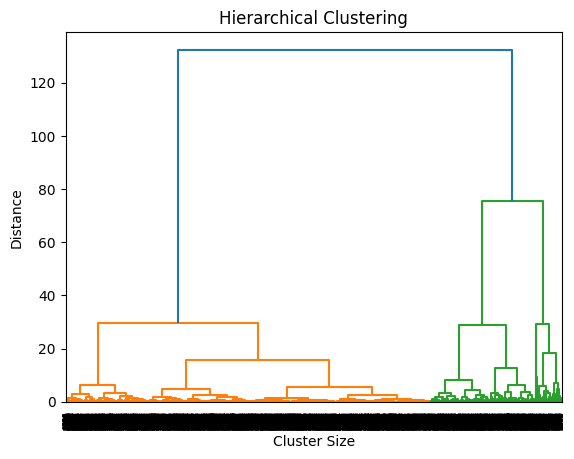

In [21]:
# Visualize Dendrogram of Clusters

hierarchy.dendrogram(Z)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering')

The dendrogram suggests that there are three distinct clusters.

*Cluster 1 (Orange): This cluster includes data points that are merged together at a lower level of dissimilarity. It represents one of the main groups of data points.*

*Cluster 2 (Green): This cluster includes another main group of data points merged together at a lower level of dissimilarity but distinct from the first cluster.*

*Cluster 3: This is the third cluster that is significantly different from the first two clusters. It might be the smaller cluster or a distinct group that is merged into the larger clusters at a higher level of dissimilarity.*

In [22]:
# Build Hierarchical Clustering model
from sklearn.cluster import AgglomerativeClustering

mdlHrcRtc = AgglomerativeClustering(n_clusters=3)
mdlHrcRtc.fit(X)
hClust_labels = mdlHrcRtc.labels_

In [23]:
silhouette_score(X, mdlHrcRtc.labels_)

0.7235224544767868

Text(0.5, 1.0, 'Hierarchical Clustering')

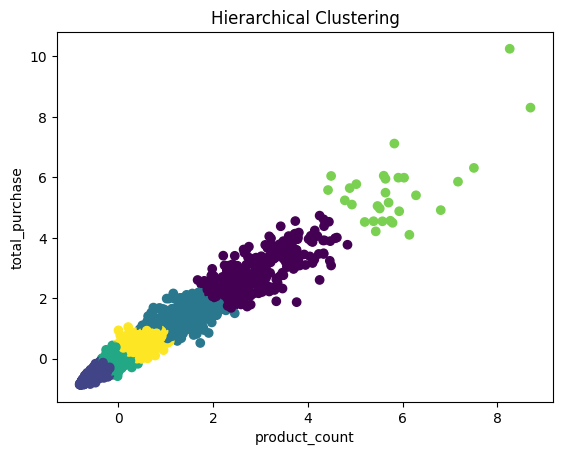

In [36]:
# Display Hierarchical cluster on scatter plot

plt.scatter(X['product_count'],X['total_purchase'],c=hClust_labels)
plt.xlabel('product_count')
plt.ylabel('total_purchase')
plt.title('Hierarchical Clustering')

In [25]:
# Function for Hierarchical Clustering
def cluster_hierarchy(X, k):
    mdlHrcRtc = AgglomerativeClustering(n_clusters=k)
    mdlHrcRtc.fit(X)
    hClust_labels = mdlHrcRtc.labels_
    hClust_sil_score = silhouette_score(X, mdlHrcRtc.labels_)
    return (hClust_labels, hClust_sil_score)

In [26]:
# Iterate over different values of k to determine best silhouette score

for k in [2, 3, 4, 5, 6]:
    hClust_labels, hClust_sil_score = cluster_hierarchy(X,k)
    print('k: ',k,'\t\t', 'Silhouette Score: ', hClust_sil_score)

k:  2 		 Silhouette Score:  0.707684223229526
k:  3 		 Silhouette Score:  0.7235224544767868
k:  4 		 Silhouette Score:  0.5705100900778021
k:  5 		 Silhouette Score:  0.5707743033286051
k:  6 		 Silhouette Score:  0.5823889450230307


In Hierarchical Clustering, the ideal cluster size is '3'. Silhouette Score is seems to be same as K-Means Clustering. Both have value of 0.723522 which is interesting.

utexas_ds_orie_divider_gray.png

### DBScan Clustering and Anomaly Detection

*DBScan stands for Density-Based Spatial Clustering of Applications with Noise.  Given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away).*

In [27]:
# Build DBScan model

from sklearn.cluster import DBSCAN

mdlDbsRtc = DBSCAN(eps=0.2)
mdlDbsRtc.fit(X)
dbscan_labels = mdlDbsRtc.labels_

In [28]:
silhouette_score(X, dbscan_labels)

0.6855644978722631

In [29]:
# calculate number of clusters
dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
dbscan_clusters

6

In [30]:
# calculate number of anomalies
dbscan_anomalies = list(dbscan_labels).count(-1)
dbscan_anomalies

61

Text(0.5, 1.0, 'DBScan Clustering')

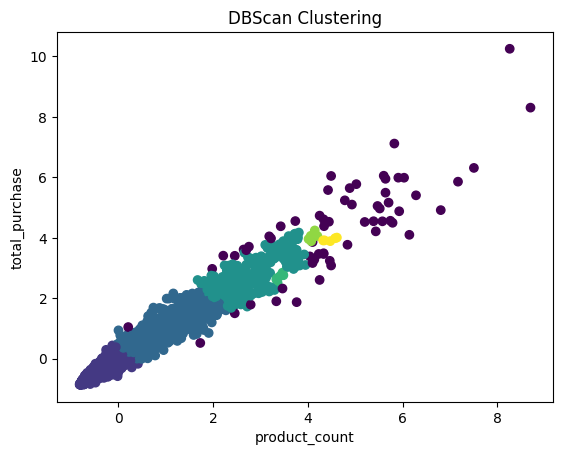

In [33]:
# Display DBScan cluster on scatter plot

plt.scatter(X['product_count'],X['total_purchase'],c=dbscan_labels)
plt.xlabel('product_count')
plt.ylabel('total_purchase')
plt.title('DBScan Clustering')

In [34]:
# Function for DBScan Clustering

def cluster_dbscan(X, e):
    mdlDbsRtc = DBSCAN(eps=e)
    mdlDbsRtc.fit(X)
    dbscan_labels = mdlDbsRtc.labels_
    dbscan_sil_score = silhouette_score(X, dbscan_labels)

    # count number of clusters and noise points
    dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    dbscan_anomalies = list(dbscan_labels).count(-1)
    return(dbscan_clusters, dbscan_anomalies, dbscan_sil_score)

In [35]:
# Iterate over different values of eps to determine best silhouette score

for eps in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    dbscan_clusters, dbscan_anomalies, dbscan_sil_score = cluster_dbscan(X, eps)
    print('eps: ',eps,'\t', 'Clusters: ', dbscan_clusters, '\t', 'Noise: ', dbscan_anomalies, '\t', 'Silhouette Score: ', dbscan_sil_score)

eps:  0.1 	 Clusters:  11 	 Noise:  264 	 Silhouette Score:  0.6479245357472734
eps:  0.2 	 Clusters:  6 	 Noise:  61 	 Silhouette Score:  0.6855644978722631
eps:  0.3 	 Clusters:  3 	 Noise:  40 	 Silhouette Score:  0.7206435039604375
eps:  0.4 	 Clusters:  5 	 Noise:  20 	 Silhouette Score:  0.7157999212429719
eps:  0.5 	 Clusters:  5 	 Noise:  15 	 Silhouette Score:  0.7174777450209849
eps:  0.6 	 Clusters:  5 	 Noise:  7 	 Silhouette Score:  0.718611678036434
eps:  0.7 	 Clusters:  4 	 Noise:  6 	 Silhouette Score:  0.7207170281481906


*The highest Silhouette Score in the DBScan model is for a cluster size '42. However, the Hierarchical Clustering and K-Means models gave better results.Even though we may not choose DBScan in this case, it is still useful in determining outliers.*  

utexas_ds_orie_divider_gray.png